# Notebook Title: *Mathematics for AI – Derivatives of Fundamental Functions*

## Introduction

This notebook continues my **“Mathematics for AI”** series, which is designed to build the essential mathematical foundation required to become an **AI Researcher**.  
In the previous notebook, we explored the behavior of basic mathematical functions — **quadratic, cubic, square root, exponential, and sine** — and studied how they grow and change in shape.  

Now, in this part of the series, we move one step deeper into **calculus**, focusing on the **derivative** — the mathematical tool that describes the **slope** or **rate of change** of a function.

Understanding derivatives is critical in AI and machine learning because:
- Optimization algorithms (like gradient descent) rely on derivatives to minimize loss functions.  
- Neural networks use derivatives to compute gradients during backpropagation.  
- Derivatives help us understand how a function behaves — whether it’s increasing, decreasing, or at a turning point.

In this notebook, we will:
- Derive the first derivatives of key mathematical functions using **Python (Sympy)**.  
- Interpret what each derivative means in terms of slope and growth.  
- Build the intuition needed for how derivatives appear in **AI, ML, and optimization** processes.

If you find this helpful, please **follow me** on Kaggle and GitHub, **upvote** the notebook, and continue learning through this series.

 **Kaggle Profile:** [https://www.kaggle.com/seki32]  
 **GitHub Profile:** [https://github.com/Rekhii]

Let’s continue our journey in **Mathematics for AI**, understanding how functions move, change, and learn — just like the models we train.


## Imports


In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sympy as sp

## What is a Derivative?
A derivative measures how much y changes when x changes by a tiny amount. If the function is y = 2x, then the derivative is always 2 (steepness is constant).

Example 1: f(x) = x²


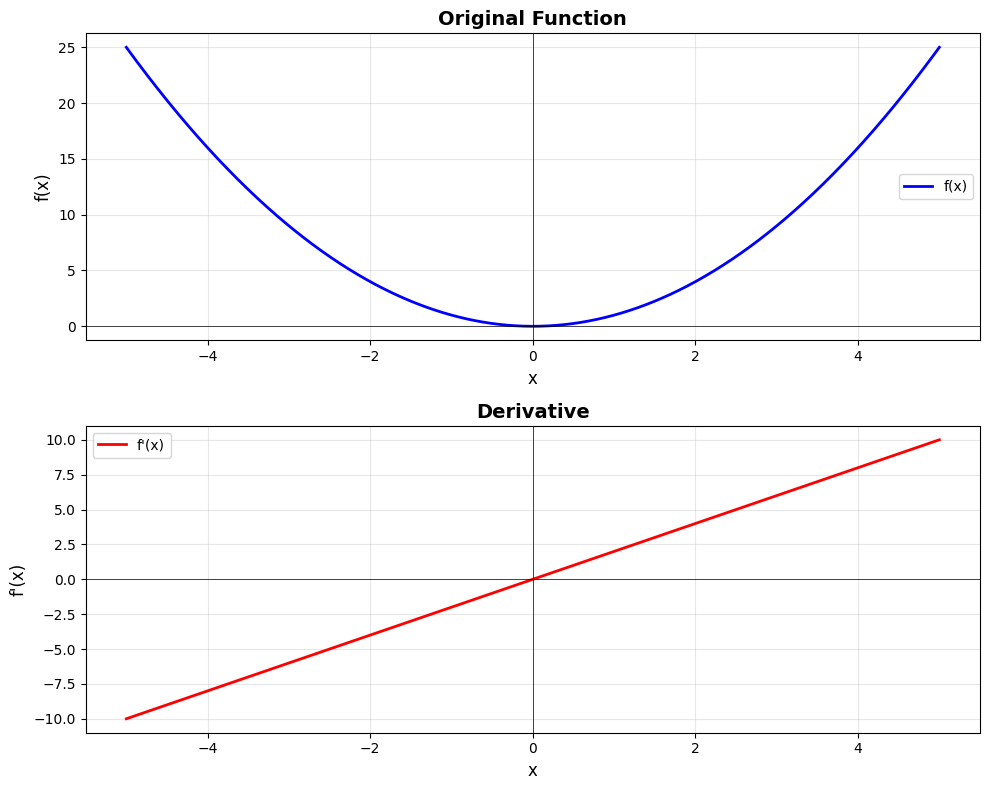


Example 2: f(x) = sin(x)


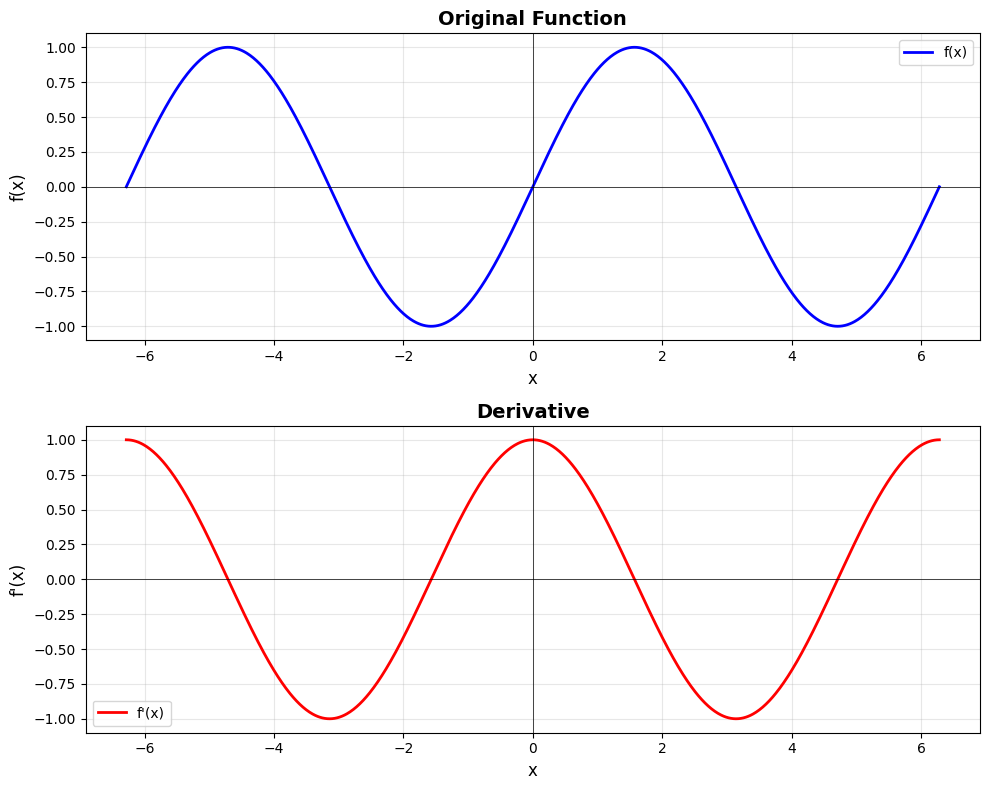


Example 3: f(x) = x³ - 3x


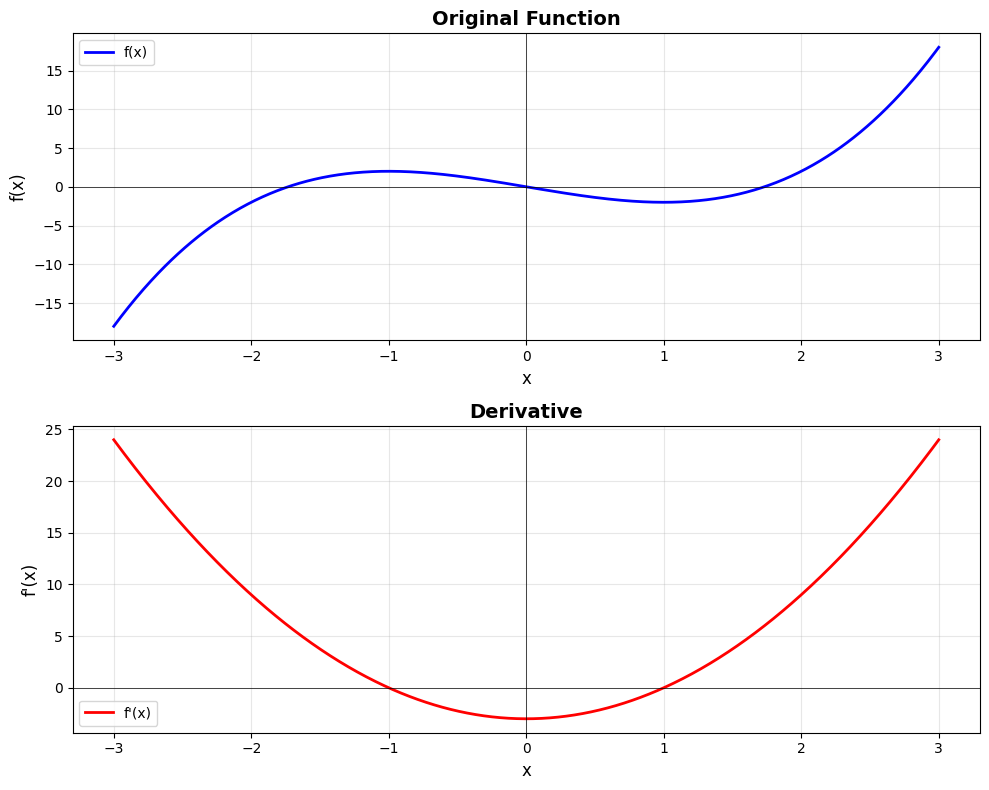


Example 4: f(x) = e^x


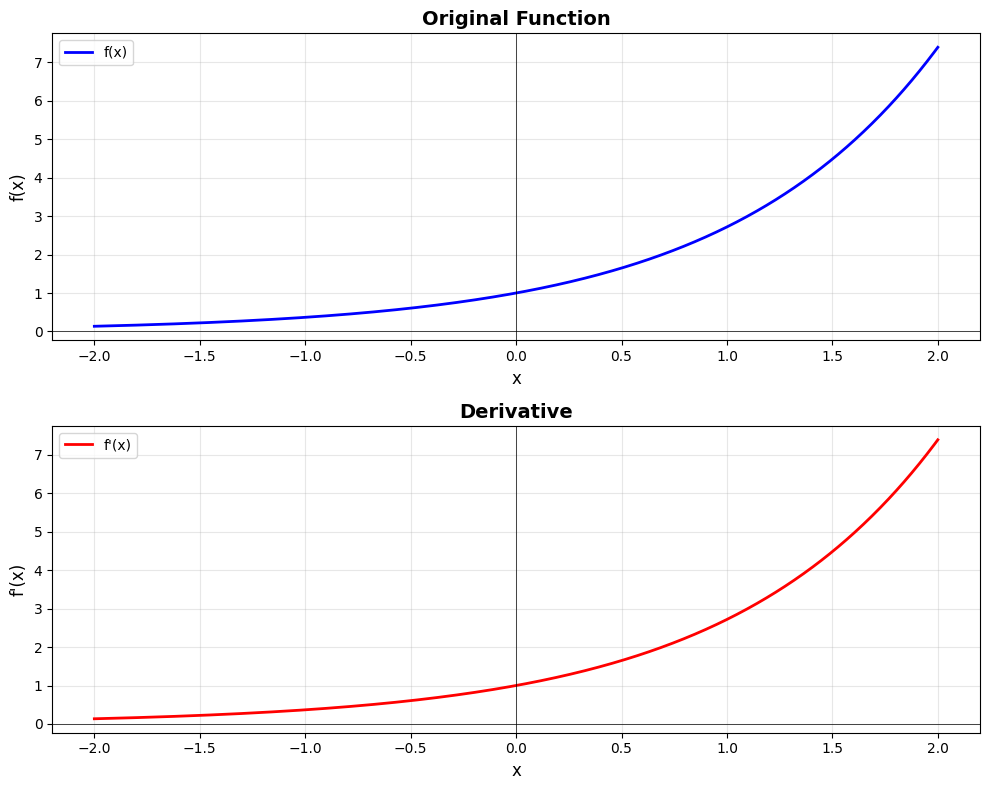


Example 5: f(x) = x²·sin(x)


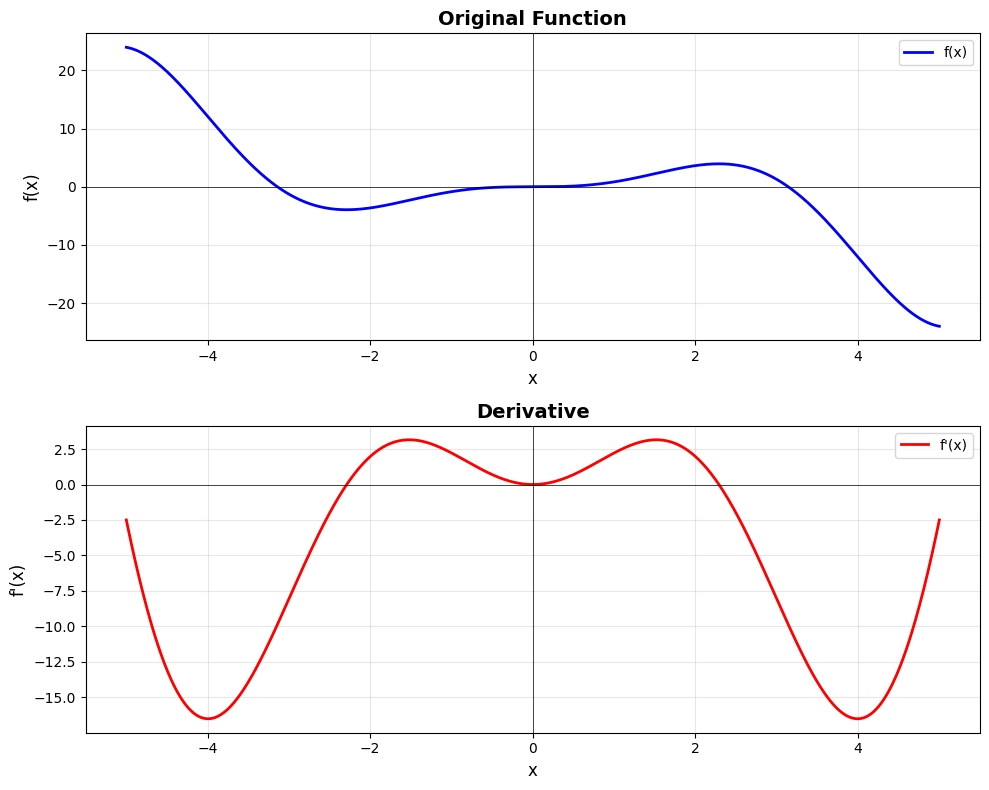

(array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
        -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
        -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
        -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
        -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
        -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
        -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
        -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
        -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
        -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
        -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
        -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
        -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
        -4.34934935, -4.33933934, -4.32932933, -4.3

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_derivative(func, x_range=(-10, 10), num_points=1000, h=1e-5):
    """
    Calculate and plot the derivative of any function.

    Parameters:
    -----------
    func : callable
        The function to differentiate (should accept numpy arrays)
    x_range : tuple
        Range of x values as (min, max)
    num_points : int
        Number of points to plot
    h : float
        Step size for numerical derivative

    Example:
    --------
    # Example 1: Polynomial
    plot_derivative(lambda x: x**2, x_range=(-5, 5))

    # Example 2: Trigonometric
    plot_derivative(lambda x: np.sin(x), x_range=(-2*np.pi, 2*np.pi))

    # Example 3: Exponential
    plot_derivative(lambda x: np.exp(x), x_range=(-2, 2))
    """

    # Generate x values
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Calculate function values
    try:
        y = func(x)
    except Exception as e:
        print(f"Error evaluating function: {e}")
        return

    # Calculate numerical derivative using central difference method
    # f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
    derivative = np.zeros_like(x)

    for i in range(len(x)):
        try:
            derivative[i] = (func(x[i] + h) - func(x[i] - h)) / (2 * h)
        except:
            derivative[i] = np.nan

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot original function
    ax1.plot(x, y, 'b-', linewidth=2, label='f(x)')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.set_title('Original Function', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)

    # Plot derivative
    ax2.plot(x, derivative, 'r-', linewidth=2, label="f'(x)")
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel("f'(x)", fontsize=12)
    ax2.set_title('Derivative', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    return x, y, derivative


# Example usage - uncomment to test:

# 1. Quadratic function
print("Example 1: f(x) = x²")
plot_derivative(lambda x: x**2, x_range=(-5, 5))

# 2. Sine function
print("\nExample 2: f(x) = sin(x)")
plot_derivative(lambda x: np.sin(x), x_range=(-2*np.pi, 2*np.pi))

# 3. Cubic function
print("\nExample 3: f(x) = x³ - 3x")
plot_derivative(lambda x: x**3 - 3*x, x_range=(-3, 3))

# 4. Exponential function
print("\nExample 4: f(x) = e^x")
plot_derivative(lambda x: np.exp(x), x_range=(-2, 2))

# 5. Complex function
print("\nExample 5: f(x) = x²·sin(x)")
plot_derivative(lambda x: x**2 * np.sin(x), x_range=(-5, 5))


##  Draw tangent lines at different points on y = x²

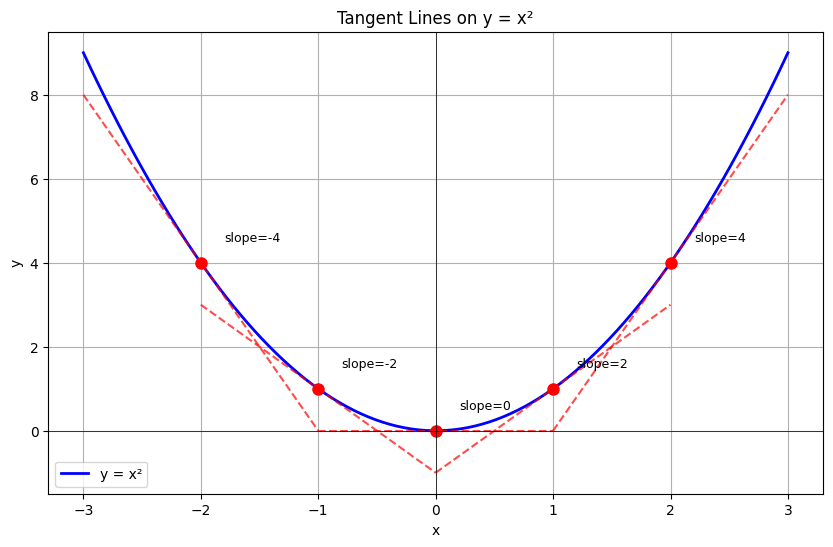

In [12]:
# Draw tangent lines at different points on y = x²
def f(x):
    return x ** 2

def df_dx(x):
    return 2 * x

def tangent_line(x, x0):
    """Equation of tangent line at x0: y = f(x0) + f'(x0)(x - x0)"""
    return f(x0) + df_dx(x0) * (x - x0)

x = np.linspace(-3, 3, 100)
y = f(x)

# Points where we'll draw tangent lines
tangent_points = [-2, -1, 0, 1, 2]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='y = x²')

# Draw tangent lines
for x0 in tangent_points:
    x_tangent = np.linspace(x0 - 1, x0 + 1, 50)
    y_tangent = tangent_line(x_tangent, x0)
    slope = df_dx(x0)
    plt.plot(x_tangent, y_tangent, 'r--', linewidth=1.5, alpha=0.7)
    plt.plot(x0, f(x0), 'ro', markersize=8)
    plt.text(x0 + 0.2, f(x0) + 0.5, f'slope={slope}', fontsize=9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangent Lines on y = x²')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()